In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
import pyfpgrowth
from pyECLAT import ECLAT
import time
from keras.models import Sequential
from keras.layers import Dense

# Data Preprocessing

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Data Science/Market_Basket_Optimisation.csv', header= None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data_lst = []
for i in range(len(data)):
    data_lst.append([str(data.values[i,j]) for j in range(data.shape[1])])

In [ ]:
main_lst = []
for i in data_lst:
    main_lst += i

try:
    while True:
        main_lst.remove('nan')
except ValueError:
    pass

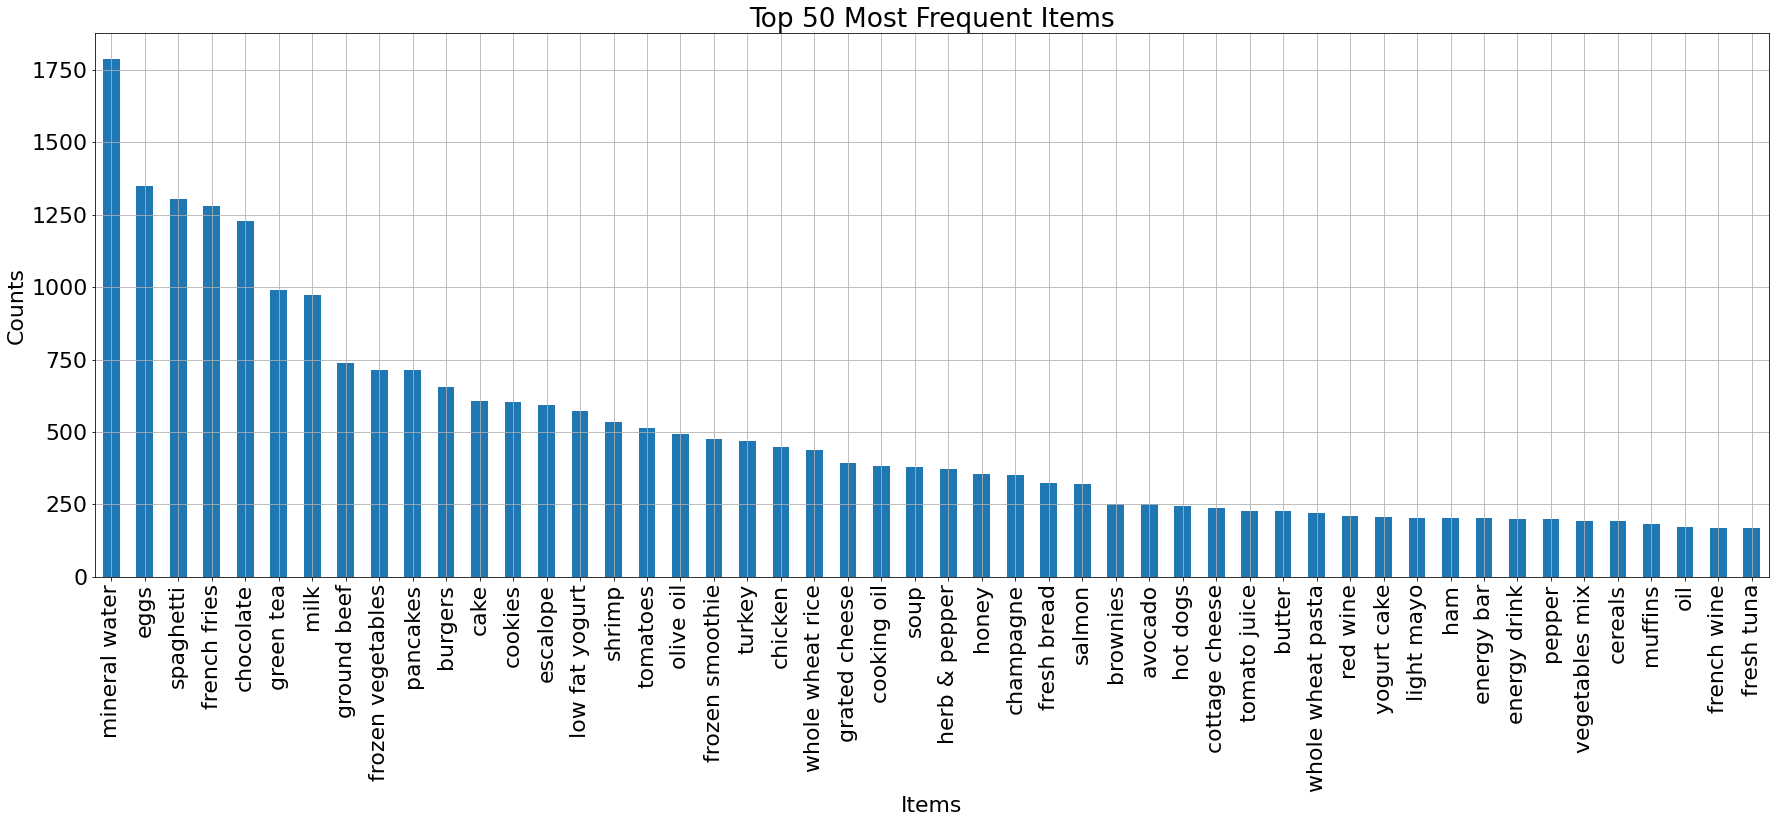

In [ ]:
df = pd.DataFrame(main_lst)
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams.update({'font.size': 22})
df[0].value_counts().head(50).plot.bar()
plt.title('Top 50 Most Frequent Items')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.grid()
plt.show()

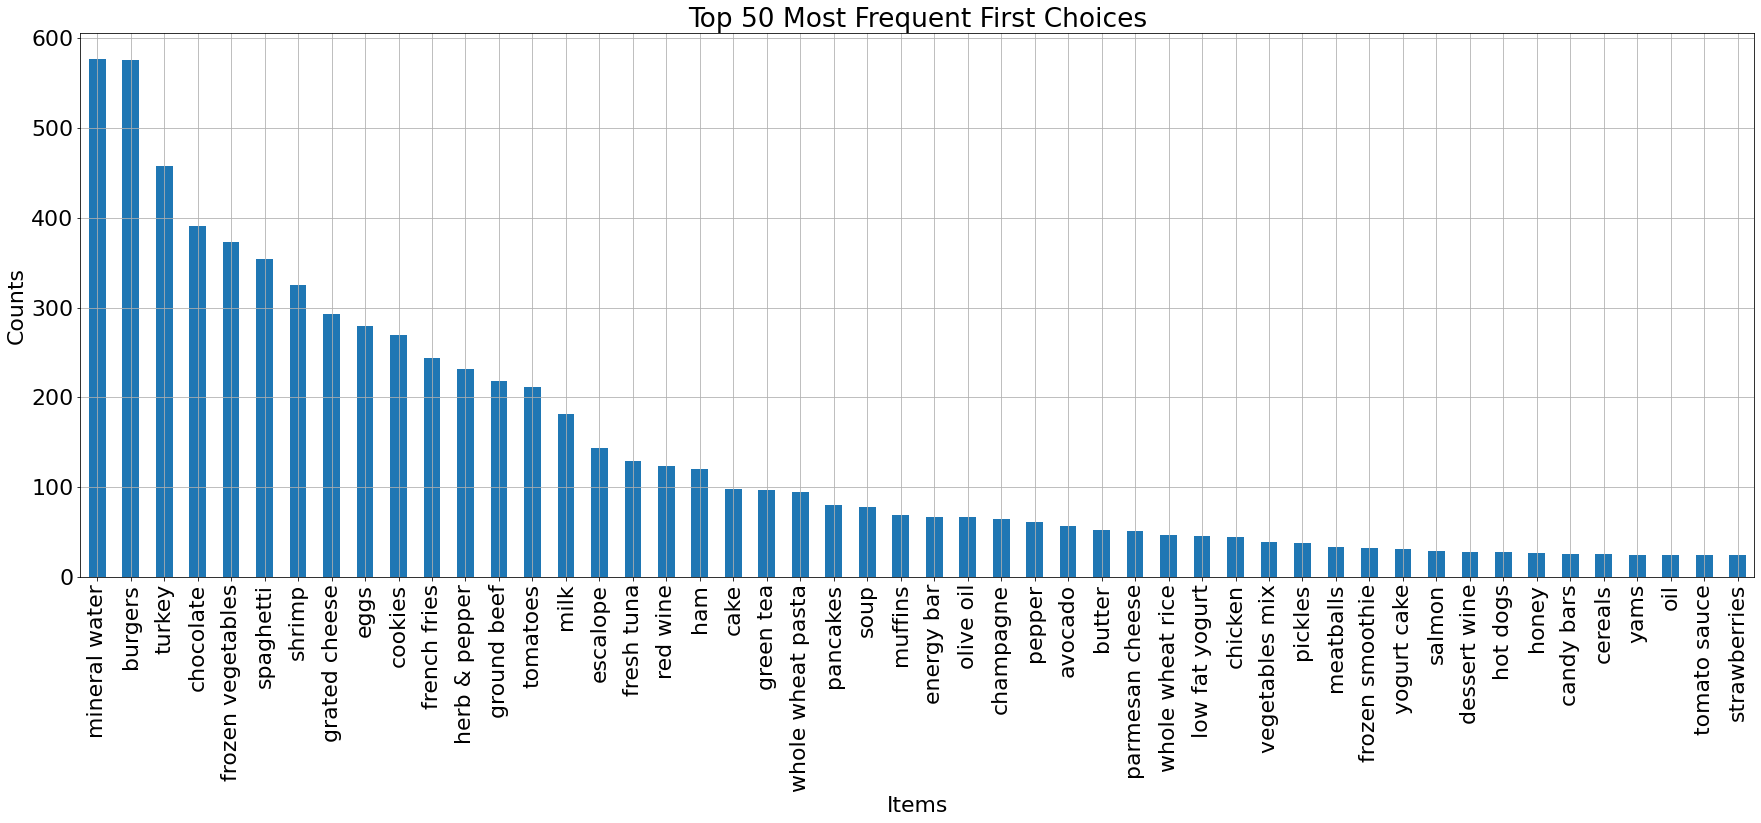

In [ ]:
plt.rcParams['figure.figsize'] = (30,10)
plt.rcParams.update({'font.size': 22})
data[0].value_counts().head(50).plot.bar()
plt.title('Top 50 Most Frequent First Choices')
plt.ylabel('Counts')
plt.xlabel('Items')
plt.grid()
plt.show()

# Apriori

In [ ]:
tran = TransactionEncoder()
dataset = tran.fit_transform(data_lst)
dataset

array([[False,  True,  True, ...,  True, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False,  True, False]])

In [ ]:
df = pd.DataFrame(dataset, columns= tran.columns_)
df.drop(columns=['nan'], inplace=True)
df.head()

,asparagus,almonds,antioxydant juice,asparagus,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,False,True,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False,False,True,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False,True,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [ ]:
# Calculation of min_support
# there are 7500 transactions and 120 distinct items
# average frequency of each item is 7500/120 = 62.5 ----- support = 0.008
# the 60th most frequent item has frequency of 25 ------- support = 0.003
start = time.time()
frequent_itemsets = apriori(df, min_support=0.003, use_colnames=True)
end = time.time()
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x : len(x))
print(end - start)
frequent_itemsets.head(20)

2.0361123085021973


,support,itemsets,length
0,0.020397,(almonds),1
1,0.008932,(antioxydant juice),1
2,0.004666,(asparagus),1
3,0.033329,(avocado),1
4,0.004533,(babies food),1
5,0.008666,(bacon),1
6,0.010799,(barbecue sauce),1
7,0.014265,(black tea),1
8,0.009199,(blueberries),1
9,0.011465,(body spray),1


In [ ]:
frequent_itemsets[frequent_itemsets['length'] >= 2].head(20)

,support,itemsets,length
115,0.005199,"(almonds, burgers)",2
116,0.003066,"(almonds, cake)",2
117,0.005999,"(chocolate, almonds)",2
118,0.006532,"(eggs, almonds)",2
119,0.004399,"(almonds, french fries)",2
120,0.003066,"(frozen vegetables, almonds)",2
121,0.005066,"(almonds, green tea)",2
122,0.003866,"(ground beef, almonds)",2
123,0.005199,"(milk, almonds)",2
124,0.007599,"(mineral water, almonds)",2


In [ ]:
start = time.time()
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
end = time.time()
print(end - start)
rules.head(50)

0.03388857841491699


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(almonds),(burgers),0.020397,0.087188,0.005199,0.254902,2.923577,0.003421,1.225089
1,(burgers),(almonds),0.087188,0.020397,0.005199,0.059633,2.923577,0.003421,1.041724
2,(almonds),(cake),0.020397,0.081056,0.003066,0.150327,1.854607,0.001413,1.081527
3,(cake),(almonds),0.081056,0.020397,0.003066,0.037829,1.854607,0.001413,1.018117
4,(chocolate),(almonds),0.163845,0.020397,0.005999,0.036615,1.795099,0.002657,1.016834
5,(almonds),(chocolate),0.020397,0.163845,0.005999,0.294118,1.795099,0.002657,1.184553
6,(eggs),(almonds),0.179709,0.020397,0.006532,0.036350,1.782108,0.002867,1.016555
7,(almonds),(eggs),0.020397,0.179709,0.006532,0.320261,1.782108,0.002867,1.206774
8,(almonds),(french fries),0.020397,0.170911,0.004399,0.215686,1.261983,0.000913,1.057089
9,(french fries),(almonds),0.170911,0.020397,0.004399,0.025741,1.261983,0.000913,1.005485


In [ ]:
rules.shape

(4880, 9)

In [ ]:
rules[(rules['lift'] >= 4) & (rules['confidence'] >= 0.2)].sort_values(by=['lift'], ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4734,"(frozen vegetables, soup)","(milk, mineral water)",0.007999,0.047994,0.003066,0.383333,7.987176,0.002682,1.543794
4720,"(frozen vegetables, olive oil)","(milk, mineral water)",0.011332,0.047994,0.003333,0.294118,6.128268,0.002789,1.348676
4204,"(mineral water, whole wheat pasta)",(olive oil),0.009599,0.065858,0.003866,0.402778,6.115863,0.003234,1.564145
4732,"(milk, soup)","(frozen vegetables, mineral water)",0.015198,0.035729,0.003066,0.201754,5.646864,0.002523,1.207988
3938,(tomato sauce),"(ground beef, spaghetti)",0.014131,0.039195,0.003066,0.216981,5.535971,0.002512,1.227052
4726,"(milk, frozen vegetables, mineral water)",(soup),0.011065,0.050527,0.003066,0.277108,5.484407,0.002507,1.313438
785,(fromage blanc),(honey),0.013598,0.047460,0.003333,0.245098,5.164271,0.002688,1.261806
3936,"(tomato sauce, spaghetti)",(ground beef),0.006266,0.098254,0.003066,0.489362,4.980600,0.002451,1.765920
364,(light cream),(chicken),0.015598,0.059992,0.004533,0.290598,4.843951,0.003597,1.325072
647,(pasta),(escalope),0.015731,0.079323,0.005866,0.372881,4.700812,0.004618,1.468107


In [ ]:
lifts = list(rules['lift'])
supports = list(rules['support'])
confidence = list(rules['confidence'])
a_support = list(rules['antecedent support'])
c_support = list(rules['consequent support'])

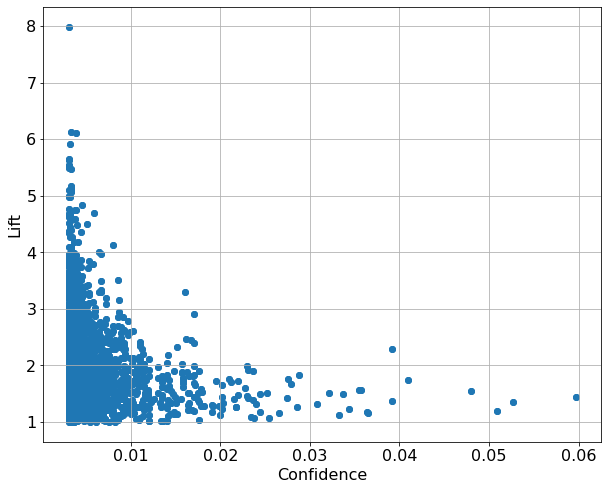

In [ ]:
plt.rcParams['figure.figsize'] = (10,8)
plt.rcParams.update({'font.size': 16})
plt.scatter(supports, lifts)
plt.xlabel('Confidence')
plt.ylabel('Lift')
plt.grid()
plt.show()

# Eclat

In [ ]:
eclat_instance = ECLAT(data=data, verbose=True)

100%|██████████| 120/120 [00:00<00:00, 2199.30it/s]


In [ ]:
e_indexes, e_supports = eclat_instance.fit(min_support=0.003, min_combination=1, max_combination=2, separator=' ---> ', verbose=True)

Combination 1 by 1


115it [00:01, 62.60it/s]


Combination 2 by 2


6555it [01:04, 101.92it/s]


In [ ]:
e_supports

{'almonds': 0.020397280362618318,
 'almonds ---> burgers': 0.005199306759098787,
 'almonds ---> cake': 0.0030662578322890282,
 'almonds ---> chocolate': 0.005999200106652446,
 'almonds ---> eggs': 0.006532462338354886,
 'almonds ---> french fries': 0.004399413411545127,
 'almonds ---> frozen vegetables': 0.0030662578322890282,
 'almonds ---> milk': 0.005199306759098787,
 'almonds ---> mineral water': 0.007598986801759766,
 'almonds ---> pancakes': 0.0030662578322890282,
 'almonds ---> spaghetti': 0.005999200106652446,
 'antioxydant juice': 0.008932142381015865,
 'asparagus': 0.004666044527396347,
 'avocado': 0.03332888948140248,
 'avocado ---> cake': 0.004266097853619517,
 'avocado ---> chocolate': 0.007065724570057326,
 'avocado ---> french fries': 0.007998933475536596,
 'avocado ---> frozen smoothie': 0.005065991201173177,
 'avocado ---> frozen vegetables': 0.004666044527396347,
 'avocado ---> olive oil': 0.0034662045060658577,
 'avocado ---> pancakes': 0.004399413411545127,
 'avocad

# FP-Growth

In [ ]:
unique = list(set(main_lst))

In [ ]:
# Numerical Encoding of items in all transactions
transactions = []
for i in range(len(data_lst)):
    temp = []
    for j in range(len(data_lst[i])):
        if(data_lst[i][j] != 'nan'):
            temp.append(unique.index(data_lst[i][j]))
    transactions.append(temp)

In [ ]:
# Min frequency set to 25 corresponding to minimum support of 0.03
# Considering the rules having support more than 0.3
start = time.time()
patterns = pyfpgrowth.find_frequent_patterns(transactions, 25)
rules = pyfpgrowth.generate_association_rules(patterns, 0.3)
end = time.time()
print('number of patterns =', len(patterns))
print('number of rules =', len(rules))
print('run time(s) =', end - start)

number of patterns = 1094
number of rules = 154
run time(s) = 0.7454478740692139


In [ ]:
rules

{(0, 37): ((63,), 0.4169381107491857),
 (0, 37, 72): ((63,), 0.3815789473684211),
 (0, 37, 75): ((63,), 0.39759036144578314),
 (0, 37, 92): ((63,), 0.37349397590361444),
 (0, 37, 106): ((63,), 0.4782608695652174),
 (0, 61): ((63,), 0.4032258064516129),
 (0, 63): ((37,), 0.43537414965986393),
 (0, 63, 72): ((37,), 0.43283582089552236),
 (0, 63, 75): ((37,), 0.4520547945205479),
 (0, 63, 92): ((37,), 0.44285714285714284),
 (0, 63, 106): ((37,), 0.5076923076923077),
 (0, 65): ((63,), 0.5714285714285714),
 (0, 72, 75): ((37,), 0.5681818181818182),
 (0, 72, 92): ((37,), 0.6122448979591837),
 (0, 75, 92): ((37,), 0.5434782608695652),
 (0, 75, 106): ((37,), 0.6511627906976745),
 (0, 80): ((37,), 0.47540983606557374),
 (0, 89): ((37,), 0.45614035087719296),
 (0, 92, 106): ((37,), 0.5813953488372093),
 (0, 107): ((63,), 0.5102040816326531),
 (4,): ((37,), 0.36633663366336633),
 (9,): ((37,), 0.36619718309859156),
 (10, 37): ((63,), 0.3984375),
 (10, 63): ((37,), 0.504950495049505),
 (10, 72): (

In [ ]:
# Extracting keys and values from rules dictionary
antecedents = list(rules.keys())
concequents = []
fp_supports = []
for i in antecedents:
    concequents.append(rules[i][0])
    fp_supports.append(rules[i][1])

In [ ]:
# Decoding the encoded numerical values
for i in range(len(antecedents)):
    temp = []
    for j in range(len(antecedents[i])):
        temp.append(unique[antecedents[i][j]])
    antecedents[i] = temp

In [ ]:
# Decoding the encoded numerical values
for i in range(len(concequents)):
    temp = []
    for j in range(len(concequents[i])):
        temp.append(unique[concequents[i][j]])
    concequents[i] = temp

In [ ]:
# Printing the rules
for i in range(len(antecedents)):
    print(antecedents[i], '--->', concequents[i], 'Support =', fp_supports[i])

['strong cheese'] ---> ['spaghetti'] Support = 0.4827586206896552
['green beans'] ---> ['spaghetti'] Support = 0.4
['whole weat flour'] ---> ['mineral water'] Support = 0.37142857142857144
['zucchini'] ---> ['mineral water'] Support = 0.36619718309859156
['magazines'] ---> ['mineral water'] Support = 0.34146341463414637
['yams'] ---> ['mineral water'] Support = 0.313953488372093
['gums'] ---> ['mineral water'] Support = 0.36633663366336633
['mineral water', 'french wine'] ---> ['spaghetti'] Support = 0.4032258064516129
['french wine', 'spaghetti'] ---> ['mineral water'] Support = 0.43103448275862066
['cereals', 'mineral water'] ---> ['milk'] Support = 0.35064935064935066
['cereals', 'spaghetti'] ---> ['mineral water'] Support = 0.52
['cereals', 'milk'] ---> ['mineral water'] Support = 0.5094339622641509
['ground beef', 'pepper'] ---> ['spaghetti'] Support = 0.5102040816326531
['spaghetti', 'pepper'] ---> ['ground beef'] Support = 0.33783783783783783
['mineral water', 'ham'] ---> ['spag

 # Deep Learning

In [ ]:
data_dl = pd.read_csv('/content/drive/MyDrive/encoded_df (1).csv')
data_dl.head()

,asparagus,almonds,antioxydant juice,asparagus.1,avocado,babies food,bacon,barbecue sauce,black tea,blueberries,body spray,bramble,brownies,bug spray,burger sauce,burgers,butter,cake,candy bars,carrots,cauliflower,cereals,champagne,chicken,chili,chocolate,chocolate bread,chutney,cider,clothes accessories,cookies,cooking oil,corn,cottage cheese,cream,dessert wine,eggplant,eggs,energy bar,energy drink,...,oil,olive oil,pancakes,parmesan cheese,pasta,pepper,pet food,pickles,protein bar,red wine,rice,salad,salmon,salt,sandwich,shallot,shampoo,shrimp,soda,soup,spaghetti,sparkling water,spinach,strawberries,strong cheese,tea,tomato juice,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,water spray,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams,yogurt cake,zucchini
0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [ ]:
data_dl.shape

(7501, 120)

In [ ]:
column_lst = []
for i in enumerate(data_dl.columns):
    column_lst.append(i[1])
    print(i)

(0, 'asparagus')
(1, 'almonds')
(2, 'antioxydant juice')
(3, 'asparagus.1')
(4, 'avocado')
(5, 'babies food')
(6, 'bacon')
(7, 'barbecue sauce')
(8, 'black tea')
(9, 'blueberries')
(10, 'body spray')
(11, 'bramble')
(12, 'brownies')
(13, 'bug spray')
(14, 'burger sauce')
(15, 'burgers')
(16, 'butter')
(17, 'cake')
(18, 'candy bars')
(19, 'carrots')
(20, 'cauliflower')
(21, 'cereals')
(22, 'champagne')
(23, 'chicken')
(24, 'chili')
(25, 'chocolate')
(26, 'chocolate bread')
(27, 'chutney')
(28, 'cider')
(29, 'clothes accessories')
(30, 'cookies')
(31, 'cooking oil')
(32, 'corn')
(33, 'cottage cheese')
(34, 'cream')
(35, 'dessert wine')
(36, 'eggplant')
(37, 'eggs')
(38, 'energy bar')
(39, 'energy drink')
(40, 'escalope')
(41, 'extra dark chocolate')
(42, 'flax seed')
(43, 'french fries')
(44, 'french wine')
(45, 'fresh bread')
(46, 'fresh tuna')
(47, 'fromage blanc')
(48, 'frozen smoothie')
(49, 'frozen vegetables')
(50, 'gluten free bar')
(51, 'grated cheese')
(52, 'green beans')
(53, '

In [ ]:
# (chocolate, frozen vegetables, mineral water)---->(shrimp)
x1 = [0]*120
x1[25] = 1
x1[49] = 1
x1[72] = 1
x1 = [x1]

In [ ]:
# (herb & pepper, french fries)	---> (ground beef)
x2 = [0]*120
x2[59] = 1
x2[43] = 1
x2 = [x2]

In [ ]:
x = data_dl.iloc[:,:].values

In [ ]:
model = Sequential()
model.add(Dense(units = kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 60,60, kernel_initializer = 'normal', activation = 'relu', input_dim = 120))
model.add(Dense(units = 30,  kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(units = 120, kernel_initializer = 'normal', activation = 'relu'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['categorical_crossentropy'])

In [ ]:
history = model.fit(x, x, batch_size = 512, shuffle=True, epochs = 20)

Epoch 1/20
15/15 [==============================] - 1s 6ms/step - loss: 27.0922 - categorical_crossentropy: 27.0922
Epoch 2/20
15/15 [==============================] - 0s 7ms/step - loss: 23.9646 - categorical_crossentropy: 23.9646
Epoch 3/20
15/15 [==============================] - 0s 6ms/step - loss: 23.5795 - categorical_crossentropy: 23.5795
Epoch 4/20
15/15 [==============================] - 0s 7ms/step - loss: 23.3479 - categorical_crossentropy: 23.3479
Epoch 5/20
15/15 [==============================] - 0s 6ms/step - loss: 23.2713 - categorical_crossentropy: 23.2713
Epoch 6/20
15/15 [==============================] - 0s 6ms/step - loss: 23.1470 - categorical_crossentropy: 23.1470
Epoch 7/20
15/15 [==============================] - 0s 7ms/step - loss: 22.8417 - categorical_crossentropy: 22.8417
Epoch 8/20
15/15 [==============================] - 0s 6ms/step - loss: 22.3664 - categorical_crossentropy: 22.3664
Epoch 9/20
15/15 [==============================] - 0s 6ms/step - loss: 

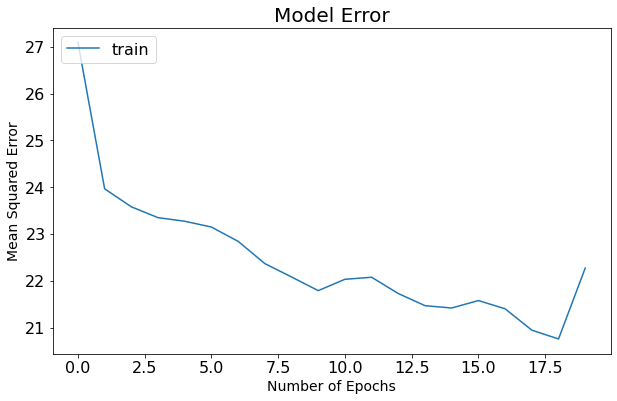

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(history.history['categorical_crossentropy'])
plt.title('Model Error', fontsize=20)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xlabel('Number of Epochs', fontsize=14)
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
x_test = x1
y1 = model.predict(x_test)
lst = []
for i in range(len(y1[0])):
    lst.append(y1[0][i])

ante = []
for i in range(len(x_test[0])):
    if(x_test[0][i] == 1):
        ante.append(column_lst[i])

print(*ante, '--->', column_lst[lst.index(max(lst))])

chocolate frozen vegetables mineral water ---> yams
